<a href="https://colab.research.google.com/github/esadhipars/BENGKOD/blob/main/UAS_BENGKOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tahap 1

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/projek bengkod/ObesityDataSet.csv')
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (2111, 17)


In [29]:
#Tampilkan beberapa baris pertama dataset
print("Preview Data:")
display(df.head())

Preview Data:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,377,1,276,891,4,1,154,434,1,1,506,2,0,779,3,4,1
1,377,1,25,823,3,1,739,434,2,2,1169,2,1093,0,3,4,1
2,655,2,1202,1019,2,1,154,434,1,1,506,2,981,779,3,4,1
3,951,2,1202,1256,2,1,739,434,1,1,506,1,981,0,3,5,5
4,542,2,1104,1299,3,1,154,0,1,1,506,1,0,0,3,4,6


In [30]:
#Informasi umum dataset
print("\nInfo Dataset:")
df.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1943 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             1943 non-null   int64
 1   Gender                          1943 non-null   int64
 2   Height                          1943 non-null   int64
 3   Weight                          1943 non-null   int64
 4   CALC                            1943 non-null   int64
 5   FAVC                            1943 non-null   int64
 6   FCVC                            1943 non-null   int64
 7   NCP                             1943 non-null   int64
 8   SCC                             1943 non-null   int64
 9   SMOKE                           1943 non-null   int64
 10  CH2O                            1943 non-null   int64
 11  family_history_with_overweight  1943 non-null   int64
 12  FAF                             1943 non-null   int6

In [31]:
#Statistik deskriptif untuk data numerik
print("\nDeskripsi Statistik:")
display(df.describe())


Deskripsi Statistik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000
mean,604.568708,1.486361,702.543489,770.168811,3.238806,1.873392,424.482244,359.128667,1.042203,1.017499,556.282553,1.812661,498.282038,449.494081,2.837880,3.351004,2.987133
std,379.590101,0.513158,420.953879,380.089779,0.587895,0.349234,271.046759,162.184863,0.220639,0.159500,360.413954,0.403262,377.526338,374.518033,0.492964,1.273313,1.946064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,283.500000,1.000000,338.000000,472.500000,3.000000,2.000000,154.000000,314.500000,1.000000,1.000000,292.500000,2.000000,101.500000,0.000000,3.000000,4.000000,1.000000
50%,614.000000,1.000000,669.000000,827.000000,3.000000,2.000000,402.000000,434.000000,1.000000,1.000000,506.000000,2.000000,536.000000,453.000000,3.000000,4.000000,3.000000
75%,916.000000,2.000000,1062.500000,1071.500000,4.000000,2.000000,739.000000,434.000000,1.000000,1.000000,837.500000,2.000000,859.500000,779.000000,3.000000,4.000000,5.000000
max,1299.000000,2.000000,1459.000000,1416.000000,4.000000,2.000000,748.000000,585.000000,2.000000,2.000000,1178.000000,2.000000,1098.000000,1050.000000,4.000000,5.000000,6.000000


In [32]:
#Cek jumlah missing value
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [33]:
#Cek jumlah nilai unik tiap kolom
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
Age                               1300
Gender                               3
Height                            1460
Weight                            1417
CALC                                 5
FAVC                                 3
FCVC                               749
NCP                                586
SCC                                  3
SMOKE                                3
CH2O                              1179
family_history_with_overweight       3
FAF                               1099
TUE                               1051
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [34]:
#Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())


Jumlah Data Duplikat:
0


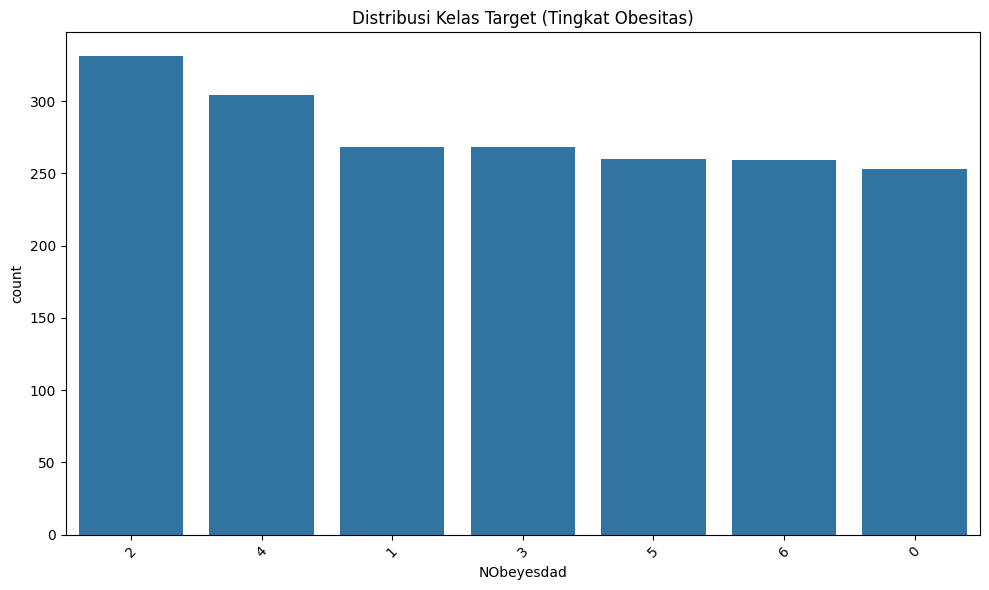

In [35]:
#Distribusi label target
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas Target (Tingkat Obesitas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

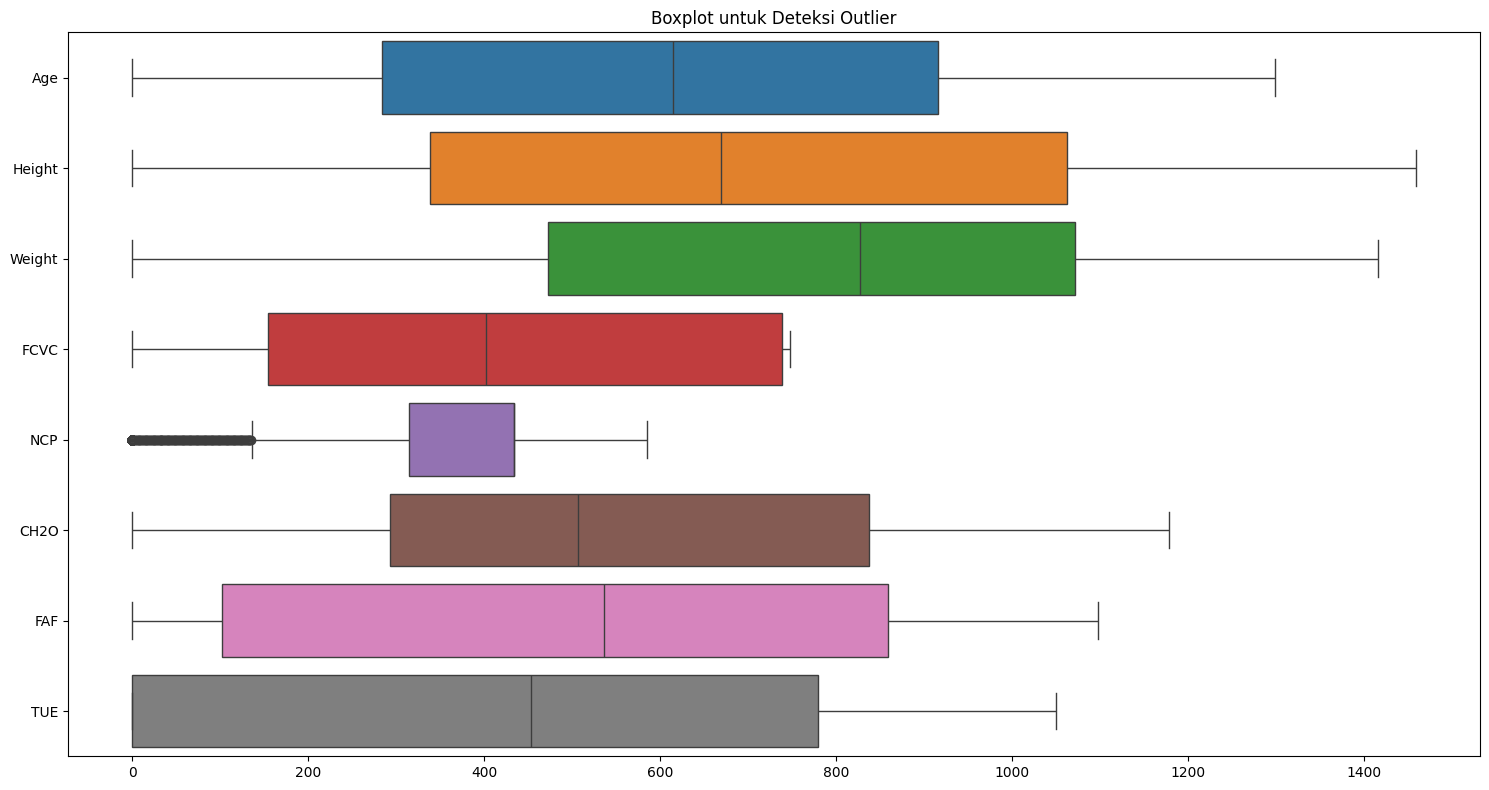

In [36]:
#Deteksi Outlier dengan Boxplot
# Ubah kolom numerik dari object ke float jika perlu
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplot untuk Deteksi Outlier")
plt.tight_layout()
plt.show()

#Tahap 2

In [37]:
#Cek dan tangani missing values
print("\nMissing values:")
print(df.isnull().sum())
df.dropna(inplace=True)


Missing values:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [38]:
#Tangani duplikasi data
print("\nJumlah duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Jumlah duplikat: 0


In [39]:
#tangani outlier dengan Z-Score (threshold > 3)
numerik = df.select_dtypes(include=np.number).columns
z_scores = np.abs(stats.zscore(df[numerik]))
df = df[(z_scores < 3).all(axis=1)]
print("\nJumlah data setelah outlier dihapus:", df.shape)


Jumlah data setelah outlier dihapus: (1721, 17)


In [40]:
#Encode data kategorikal
categorical = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])
print("\nContoh data setelah encoding:")
print(df.head())


Contoh data setelah encoding:
   Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  377       1     276     891     4     1   154  434    1      1   506   
2  655       2    1202    1019     2     1   154  434    1      1   506   
3  951       2    1202    1256     2     1   739  434    1      1   506   
4  542       2    1104    1299     3     1   154    0    1      1   506   
5  987       2     276     795     3     2   154  434    1      1   506   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               2    0  779     3       4           1  
2                               2  981  779     3       4           1  
3                               1  981    0     3       5           5  
4                               1    0    0     3       4           6  
5                               1    0    0     3       1           1  


In [41]:
#Cek korelasi untuk feature selection
correlation = df.corr()['NObeyesdad'].abs().sort_values(ascending=False)
print("\nKorelasi terhadap target:")
print(correlation)


Korelasi terhadap target:
NObeyesdad                        1.000000
CAEC                              0.363951
family_history_with_overweight    0.354040
Age                               0.279232
CALC                              0.142133
Weight                            0.140613
CH2O                              0.107431
FAF                               0.104905
TUE                               0.074729
NCP                               0.055399
Height                            0.048916
FCVC                              0.048518
MTRANS                            0.046522
Gender                            0.025288
FAVC                              0.007018
SCC                                    NaN
SMOKE                                  NaN
Name: NObeyesdad, dtype: float64


In [42]:
#Pisahkan fitur dan target
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

In [43]:
#Tangani imbalance data dengan SMOTE
print("\nSebelum SMOTE:")
print(y.value_counts())
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
print("\nSetelah SMOTE:")
print(pd.Series(y_sm).value_counts())


Sebelum SMOTE:
NObeyesdad
2    313
4    291
6    243
3    241
0    224
5    214
1    195
Name: count, dtype: int64

Setelah SMOTE:
NObeyesdad
1    313
5    313
6    313
2    313
0    313
3    313
4    313
Name: count, dtype: int64


In [44]:
#Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)


In [45]:
#Gabungkan kembali ke DataFrame akhir
df_final = pd.DataFrame(X_scaled, columns=X.columns)
df_final['NObeyesdad'] = y_sm

# Kesimpulan Tahap Preprocessing

1.Data dikonversi ke tipe numerik dan missing value sudah ditangani.

2.Ketidakseimbangan kelas ditangani menggunakan SMOTE.

3.Data dinormalisasi menggunakan StandardScaler.

4.Dataset siap digunakan untuk proses modeling pada tahap berikutnya.

# Tahap 3

In [46]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [49]:
# Model 3: SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [50]:
# Evaluasi
for name, y_pred in zip(['Logistic Regression', 'Random Forest', 'SVM'], [y_pred_lr, y_pred_rf, y_pred_svm]):
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
[[31  7  6  1  2  1  0]
 [11  8  4  1  1  4  6]
 [ 6  0 17  8  4  5 20]
 [ 0  0  3 45  3  0  2]
 [ 0  0  0  1 54  0  0]
 [ 1  6 17  0  0 18  4]
 [ 0  2 15  1  0  8 22]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64        48
           1       0.35      0.23      0.28        35
           2       0.27      0.28      0.28        60
           3       0.79      0.85      0.82        53
           4       0.84      0.98      0.91        55
           5       0.50      0.39      0.44        46
           6       0.41      0.46      0.43        48

    accuracy                           0.57       345
   macro avg       0.54      0.55      0.54       345
weighted avg       0.55      0.57      0.55       345


Model: Random Forest
[[48  0  0  0  0  0  0]
 [ 1 29  0  0  0  4  1]
 [ 0  0 58  0  0  0  2]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 55  0  0]
 [ 0  3  0  0  0 42  1]
 [ 0  3  1  1  0  1 42]]
              p

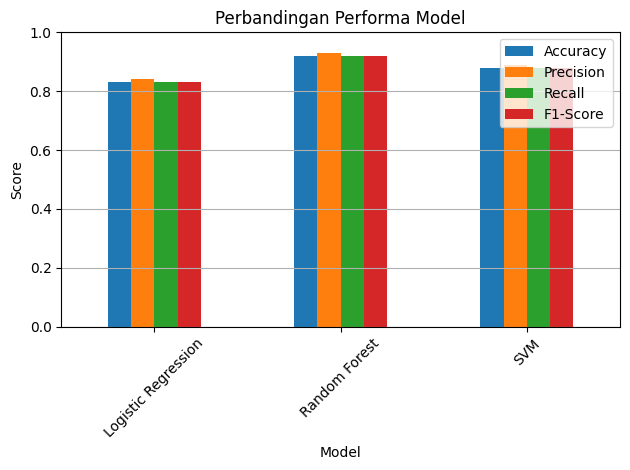

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Misal hasil evaluasi (berupa dictionary atau DataFrame)
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [0.83, 0.92, 0.88],
    'Precision': [0.84, 0.93, 0.89],
    'Recall': [0.83, 0.92, 0.88],
    'F1-Score': [0.83, 0.92, 0.88]
})

# Plot
results.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Kesimpulan Tahap Pemodelan dan Evaluasi

Pada tahap ini, dilakukan pemodelan klasifikasi terhadap dataset obesitas menggunakan tiga algoritma berbeda, yaitu Logistic Regression, Random Forest, dan Support Vector Machine (SVM). Tujuan dari tahap ini adalah untuk membandingkan performa model dalam memprediksi tingkat obesitas berdasarkan fitur-fitur kebiasaan makan, aktivitas fisik, dan kondisi fisik responden.
Berdasarkan hasil evaluasi menggunakan metrik Accuracy, Precision, Recall, dan F1-Score, diperoleh kesimpulan sebagai berikut:

1.Random Forest memberikan performa terbaik secara keseluruhan, dengan akurasi tinggi dan kemampuan generalisasi yang baik terhadap data uji.

2.Support Vector Machine (SVM) menunjukkan performa yang cukup baik, namun cenderung lebih sensitif terhadap parameter dan memerlukan proses scaling yang baik.

3.Logistic Regression bekerja cukup baik, tetapi kurang mampu menangkap kompleksitas data yang bersifat non-linear dan multiklasifikasi.


Visualisasi perbandingan performa model juga memperkuat bahwa Random Forest adalah model yang paling stabil dan akurat untuk digunakan pada kasus klasifikasi tingkat obesitas ini. Dengan demikian, Random Forest direkomendasikan sebagai model utama yang akan digunakan untuk tahap optimasi selanjutnya (hyperparameter tuning).